In [2]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
from scipy import stats 
plt.style.use('fivethirtyeight') 

In [4]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabtesmelitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']
data.columns              

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabtesmelitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
       'anemia', 'class'],
      dtype='object')

In [11]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


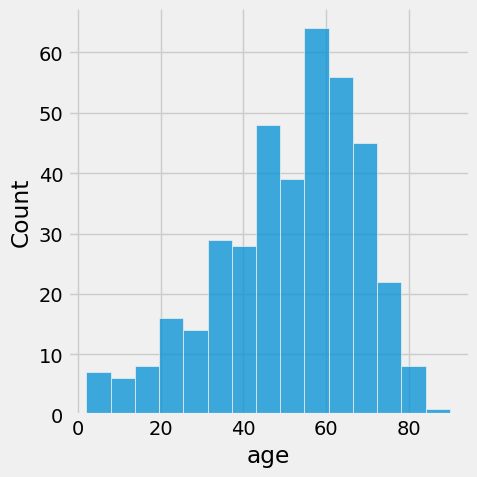

In [12]:
sns.displot(data.age)

AttributeError: ignored

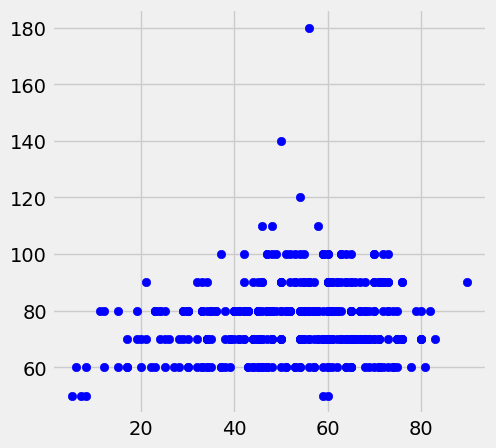

In [13]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlable('age')
plt.ylable('blood_pressure')
plt.title('age vs blood Scatter plot')

In [17]:
contcols=set(data.dtypes[data.dtypes !='0'].index.values)
print(contcols)

{'coronary_artery_disease', 'id', 'age', 'packed_cell_volume', 'blood_urea', 'appetite', 'class', 'serum_creatinine', 'diabtesmelitus', 'pedal_edema', 'bacteria', 'blood glucose random', 'anemia', 'hypertension', 'pus_cell_clumps', 'blood_pressure', 'potassium', 'specific_gravity', 'sodium', 'white_blood_cell_count', 'red_blood_cell_count', 'sugar', 'hemoglobin', 'pus_cell', 'red_blood_cells', 'albumin'}


TypeError: ignored

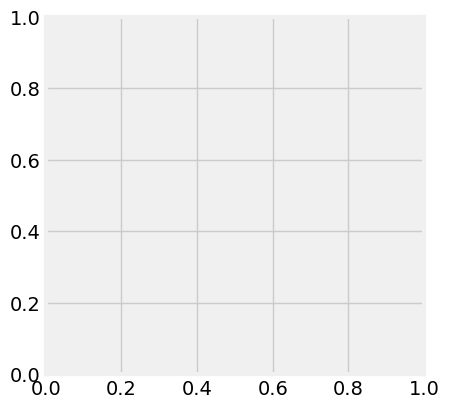

In [20]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :
       ax = plt.subplot(3,4,plotnumber)
       plt.scatter(data['age'],data[column])
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
    plt.show   

In [27]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
f,ax=plt.subplots(figsize=(18,10)
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

SyntaxError: ignored

In [29]:
sns.countplot(data['class])

SyntaxError: ignored

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

NameError: ignored

In [32]:
selcols=['red_blood_cell','pus_cell','blood glucose random','blood_urea',
         'pedal_edam','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)         

(400, 8)
(400, 1)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)